### Librerias empleadas

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import cv2

### Datos empleados para el entrenamiento y prueba del modelo CNN

In [2]:
#Usamos numpy al cargar datos puramente numéricos
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')
X_test=np.loadtxt('input_test.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


Transformamos el formato de las imagenes a 100x100 píxeles en 3 canales=RGB y normalizamos los valores de la imagen entre 0 y 1 

In [3]:
X_train=X_train.reshape(len(X_train),100,100,3)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(400, 100, 100, 3)
(2000, 1)
(400, 1)


Creamos la función encargada de aplicar el filtro (Sobel)

In [ ]:
def aplicar_filtro(imagen):
    
    imagen_uint8 = (imagen * 255).astype(np.uint8) if imagen.max() <= 1.0 else imagen.astype(np.uint8)
    
    imagen_gris = cv2.cvtColor(imagen_uint8, cv2.COLOR_RGB2GRAY)
    
    grad_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
    
    grad_mag = cv2.magnitude(grad_x, grad_y)
    
    grad_mag = cv2.normalize(grad_mag, None, 0, 255, cv2.NORM_MINMAX)
    grad_mag = grad_mag.astype(np.uint8)
    
    imagen_filtrada = cv2.cvtColor(grad_mag, cv2.COLOR_GRAY2RGB)
    
    return imagen_filtrada.astype(np.float32) / 255.0

X_train_filtrado = np.array([aplicar_filtro(img) for img in X_train])
X_test_filtrado = np.array([aplicar_filtro(img) for img in X_test])


Visualizamos una comparación entre las imagenes originales y las filtradas

Original


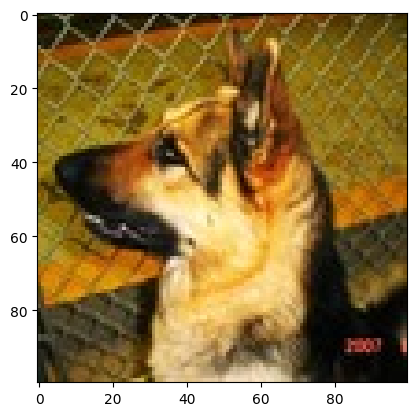

Filtrado


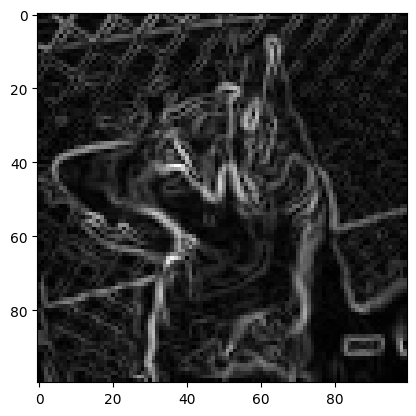

In [38]:
idx=random.randint(0, len(X_train))
X_train[1,:]
print("Original")
plt.imshow(X_train[idx,:])
plt.show()

print("Filtrado")
plt.imshow(X_train_filtrado[idx,:])
plt.show()

### Creación del Modelo CNN

In [42]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(16,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Conv2D(24,(3,3),activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        Dropout(rate=0.3),
        Dense(128,activation='relu'),
        Dense(1,activation='sigmoid')      
])

### Entrenamiento del Modelo con las imagenes originales

In [7]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=15,batch_size=16)

Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5334 - loss: 0.6911
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6095 - loss: 0.6560
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6503 - loss: 0.6156
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7277 - loss: 0.5524
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7323 - loss: 0.5369
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7784 - loss: 0.4751
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7920 - loss: 0.4504
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7777 - loss: 0.4719
Epoch 9/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8189 - loss: 0.3973
Epoch 10/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8388 - loss: 0.3627
Epoch 11/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8365 - loss: 0.3725
Epoch 12/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 

### Análisis de las Predicciones con las imagenes originales

In [8]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7620 - loss: 0.5784  


[0.6314522624015808, 0.7024999856948853]

### Entrenamiento del Modelo con las imagenes filtradas

In [43]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0005),metrics=['accuracy'])
model.fit(X_train_filtrado,Y_train,epochs=10,batch_size=16)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5114 - loss: 0.6938
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6327 - loss: 0.6410
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6913 - loss: 0.5723
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7530 - loss: 0.5179
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7747 - loss: 0.4688
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8057 - loss: 0.4361
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8180 - loss: 0.4085
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8287 - loss: 0.3916
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8534 - loss: 0.3365
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8587 - loss: 0.3291


### Análisis de las Predicciones con las imagenes filtradas

In [44]:
model.evaluate(X_test_filtrado,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7755 - loss: 0.5490  


[0.6546976566314697, 0.7200000286102295]

### Prueba del modelo entrenado con imagenes originales

Original


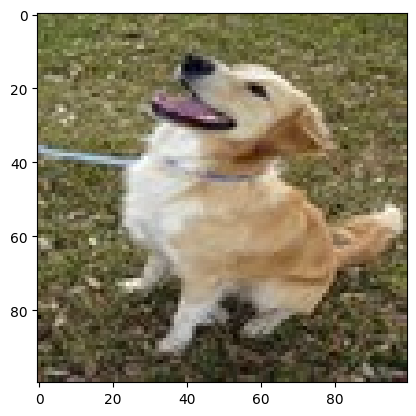

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[0.01382682]]
This is a dog
Filtrado


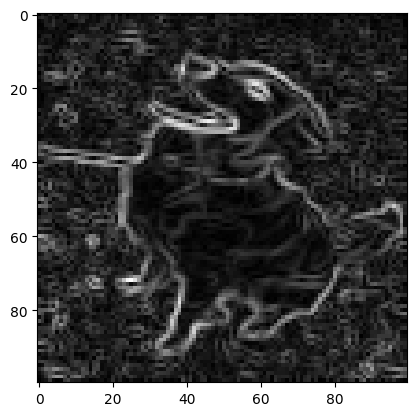

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.05287866]]
This is a dog


In [45]:
idx2=random.randint(0, len(X_test))

print("Original")
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5

if y_pred==1:
    print("This is a cat")
else:   
    print("This is a dog")

print("Filtrado")
plt.imshow(X_test_filtrado[idx2,:])
plt.show()

y_pred=model.predict(X_test_filtrado[idx2,:].reshape(1,100,100,3))
print(y_pred)
y_pred=y_pred>0.5

if y_pred==1:
    print("This is a cat")
else:   
    print("This is a dog")

### Justifiación y Conclusiones

El filtro seleccionado para aplicar a las imágenes antes de ingresar al modelo fue el filtro de Sobel, especializado en la detección de bordes. Este tipo de filtro resalta características relevantes de los animales, como las orejas, el hocico, la forma de los ojos y la silueta general. Estos elementos estructurales son particularmente útiles para diferenciar entre las especies, más allá de las variaciones en colores o texturas.

Al comparar los resultados obtenidos con y sin la aplicación del filtro, se observan valores de accuracy y loss similares, aunque con una ligera mejora al utilizar las imágenes filtradas.
Además, es importante destacar que, al emplear el filtro, el modelo logró alcanzar un desempeño aceptable en menos épocas de entrenamiento. Esto sugiere que el preprocesamiento con el filtro de Sobel facilita el procesamiento de las imágenes y acelera el aprendizaje del modelo.

Para mejorar el modelo podríamos implementar algunas mejoras:
- Ampliar la muestra de imágenes de gatos y perros, incluyendo una mayor diversidad de razas y características físicas.

- Ajustar diferentes hiperparámetros del modelo, como la tasa de aprendizaje, número de filtros, tamaño de las capas, entre otros, en búsqueda de un mejor desempeño.

- Utilizar imágenes de mayor resolución, lo cual permitiría capturar bordes y detalles más precisos, facilitando la tarea de diferenciación para el modelo.